In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
%matplotlib inline

In [53]:
combined_data = pd.read_csv('combined_data.csv', index_col=['Date'], parse_dates=['Date'])
combined_data

,Tesla_Volume,Tesla_Open,Tesla_High,Tesla_Low,Tesla_Close,Case..,Year,Country,State,Description,...,Cyclists.Peds,TSLA.cycl...peds,Model,Autopilot.claimed,Reported.in.NHTSA.SGO,Lucid_Volume,Lucid_Open,Lucid_High,Lucid_Low,Lucid_Close
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-03,119534800,221.1500,226.3701,218.4000,219.9600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,32179100.0,4.660,4.850,4.55,4.62
2023-11-02,125987600,212.9700,219.2000,211.4500,218.5100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47135750.0,4.130,4.615,4.12,4.54
2023-11-01,121661700,204.0400,205.9900,197.8500,205.6600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21911580.0,4.130,4.140,3.96,4.05
2023-10-31,118068300,196.1200,202.8000,194.0700,200.8400,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20320210.0,4.065,4.175,4.04,4.12
2023-10-30,136448200,209.2800,210.8800,194.6700,197.3600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18462870.0,4.100,4.140,4.00,4.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-11,209467245,9.4000,9.6947,9.1400,9.6465,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-08,336691932,9.0987,9.3733,8.8213,9.1967,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-07,332808134,9.6127,9.7100,9.1747,9.3181,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# drop na values
Tesla_Close = combined_data["Tesla_Close"].dropna()

# convert to string, make all 2 decimal places
Tesla_Close = Tesla_Close.apply(lambda x: '{:.2f}'.format(x))

# convert back to numeric
Tesla_Close = Tesla_Close.astype(float)
Tesla_Close

Date
2023-11-03    219.96
2023-11-02    218.51
2023-11-01    205.66
2023-10-31    200.84
2023-10-30    197.36
               ...  
2013-11-11      9.65
2013-11-08      9.20
2013-11-07      9.32
2013-11-06     10.08
2013-11-05     11.79
Name: Tesla_Close, Length: 2518, dtype: float64

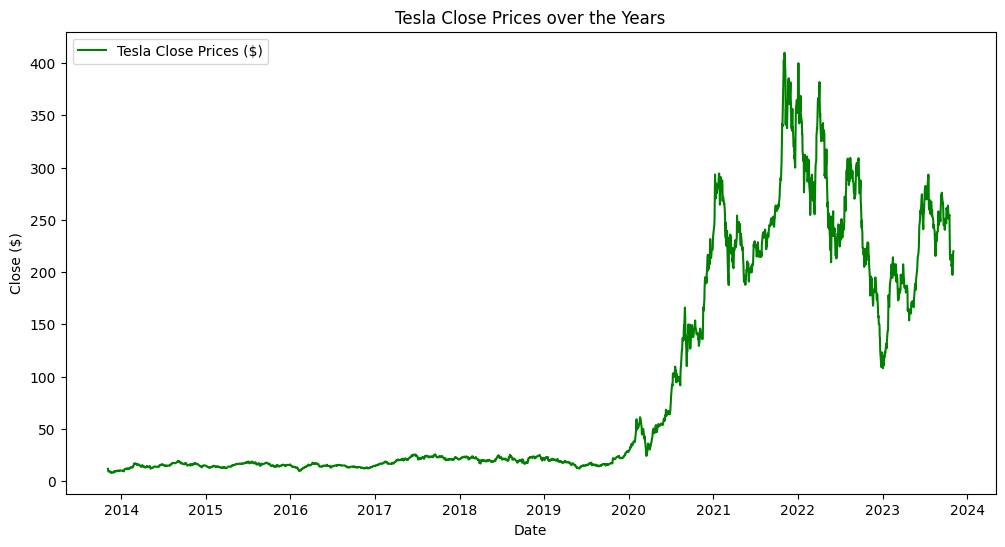

In [55]:
# plot tesla stock prices over time (since they went public)
plt.figure(figsize=(12, 6))
plt.plot(Tesla_Close.index, Tesla_Close, label='Tesla Close Prices ($)', color='green')
plt.title('Tesla Close Prices over the Years')
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.legend()
plt.show()

This plot accurately presents Tesla stock information from the very beginning of when it went public.

In [76]:
# gather all the death dates we are going to highlight
tesla_deaths = pd.read_csv('tesla_deaths.csv')
tesla_deaths['Date'] = pd.to_datetime(tesla_deaths['Date'])
tesla_deaths["Date"]

0     2023-10-14
1     2023-10-14
2     2023-10-13
3     2023-10-10
4     2023-10-04
         ...    
285   2014-07-14
286   2014-07-04
287   2014-07-04
288   2013-11-02
289   2013-04-02
Name: Date, Length: 290, dtype: datetime64[ns]

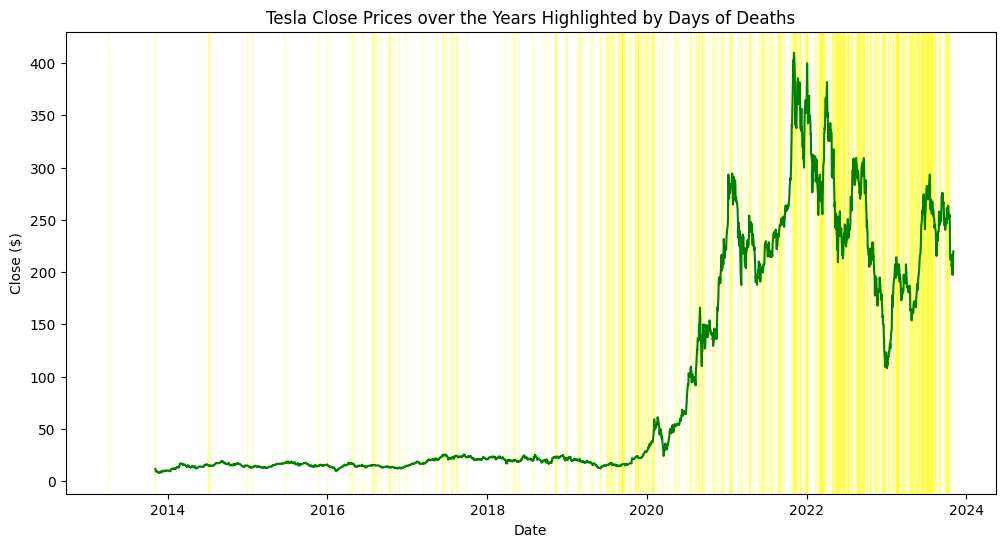

In [78]:
# plot the stock prices over time but this time highlight the days where there were deaths
plt.figure(figsize=(12, 6))
plt.plot(Tesla_Close.index, Tesla_Close, label='Tesla Close Prices ($)', color='green')
plt.title('Tesla Close Prices over the Years Highlighted by Days of Deaths')
plt.xlabel('Date')
plt.ylabel('Close ($)')

for date in tesla_deaths["Date"]:
    plt.axvspan(date, date + pd.to_timedelta(1, unit='D'), color='yellow', alpha=0.3, label=f'Highlighted Day {date.date()}')


plt.show()

This plot shows the accurate stock prices of Tesla over time since it went public. The yellow vertical lines highlight the days on the x axis when a fatal Tesla car accident happened. There is one fatal accident that was published, but happened before Tesla went public. The aim of this visualization is to see if the fatal car accidents have an impact on the stock prices following the event. The stock prices do not immedietely nor consistently lower when a fatal Tesla car accident has happened. This could be due to multiple factors. One is that many people may not read the news, or at least the sources that the articles of Tesla crashes are published in. Another is that car crashes are quite common, so even though Tesla is advertised as being (partially) autonomous, it is expected for crashes to still happen anyways. Thirdly, new, promising, and flashy technology such as autonomous cars may be attractive for investors, and outweigh the risks that come from investing in a car that can crash. It is also important to note that the increase in highlighted days (more crashes) may be due to the fact that as the years progressed, more and more Teslas were sold, which means there are many more opportunities for these Tesla crashes to happen (a Tesla can't crash if it's not being driven).

In [79]:
mean_tesla_close = Tesla_Close.mean()
tesla_sd = Tesla_Close.std()
print(mean_tesla_close)
print(tesla_sd)

90.53092136616348
107.42690578360029


In [80]:
ma_day = [10,50,200]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        combined_data[column_name] = combined_data["Tesla_Close"].rolling(ma).mean()

[*********************100%%**********************]  1 of 1 completed


/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warni

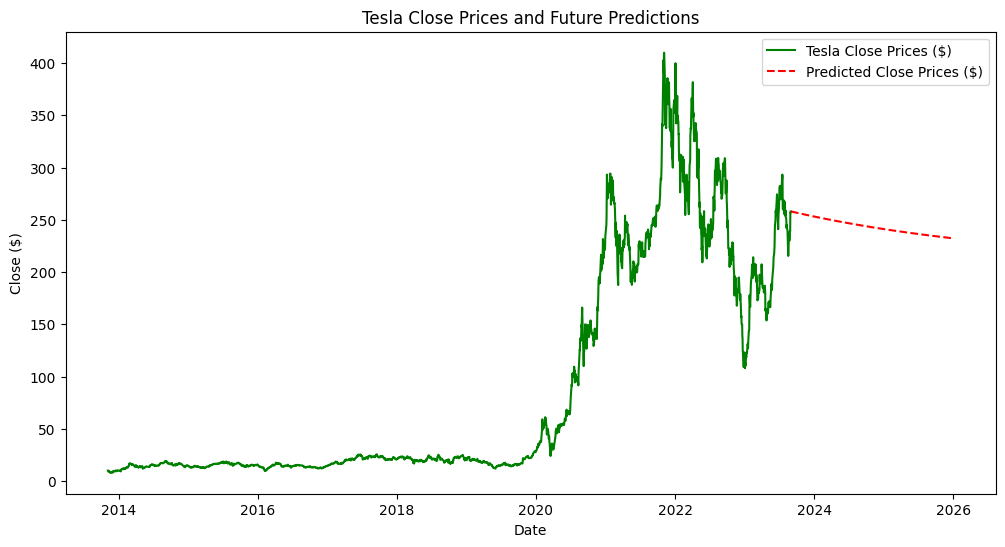

In [81]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fetch historical Tesla stock data
data = yf.download("TSLA", start="2013-11-05", end="2023-09-01")

# Feature engineering (example: using previous close prices as a feature)
data['Previous_Close'] = data['Close'].shift(1)

# Remove rows with missing data
data = data.dropna()

# Create a linear regression model (you should replace this with your trained model)
model = LinearRegression()
X_train = data[['Previous_Close']]
y_train = data['Close']
model.fit(X_train, y_train)


# Specify the end date you want to predict up to
end_date = pd.to_datetime("2026-01-01")

# Create a DataFrame with dates for the future prediction
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), end=end_date, freq='D')

# Create a DataFrame to store the predicted prices
predicted_data = pd.DataFrame(index=future_dates, columns=['Predicted_Close'])

# Initialize the first predicted price with the last known close price
last_known_price = data['Close'].iloc[-1]
predicted_data['Predicted_Close'] = last_known_price

# Predict future prices
for i in range(1, len(future_dates)):
    previous_close = predicted_data['Predicted_Close'].iloc[i - 1]
    predicted_price = model.predict(np.array([[previous_close]]))
    predicted_data['Predicted_Close'].iloc[i] = predicted_price[0]

# Concatenate the historical and predicted data
full_data = pd.concat([data, predicted_data])

# Create a plot for actual and predicted close prices
plt.figure(figsize=(12, 6))
plt.plot(full_data.index, full_data['Close'], label='Tesla Close Prices ($)', color='green')
plt.plot(full_data.index, full_data['Predicted_Close'], label='Predicted Close Prices ($)', color='red', linestyle='--')
plt.title('Tesla Close Prices and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.legend()
plt.show()


This machine learning model can predict future stock prices. It doesn't seem to do that very well, however. There is not much of a peak pattern as we see with the more recent stock proces. The dashed red lined (predicted values) has a sort of linear decreasing value.